<a href="https://colab.research.google.com/github/Obreintelly/KNN_NB_Implementation/blob/main/KNN_Implentation_On_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a. Specifying the Question**

In this analytical study, the key ask is the develoment of a model that determines whether or not a passenger survived the Titanic Sea Accident. 



**b. Defining the Success Metric**

For this analysis, we will build a KNN Classification Model and determine through various optimisation processes the model with optimum accuracy scores. A model with accuracy of 80%+ would be a demonstration of success.



**c. Understanding the Context**

The sinking of the RMS Titanic in the morning hours of April 15 1912 in the North Atlantic Ocean was one of the singlemost disaster that captured the attention of the world just four days after leaving Southampton for New York. The incident led to sweeping reforms in Maritime Regulations. 

Of the just over 2000 passengers, close to 70% lost their lives. The data being available, and different factors enhancing survival chances of a passenger, we can build a model to determine the survival rates given a set of factors. 



**d. Data Validation**

There is only one Titanic Disaster dataset hence no need for validation. In any case, we validate our data with this source: https://en.wikipedia.org/wiki/Sinking_of_the_Titanic 



**e. Recording the Experimental Design**

a) Data Cleaning/Preparation

b) Exploratory Data Analysis

c) Building the Models

d)Conclusions
e) Applying Model to Test Data

# **2. Importing Relevant Libraries**

In [ ]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

import warnings
warnings.filterwarnings("ignore")

# **3. Loading the Datasets**

In [ ]:
#Loading the train dataset
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

#Loading the test dataset
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

# **3. Checking the Datasets**

In [ ]:
#Previewing the first 5 rows of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Previewing the last five rows of train dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Previewing the first 5 rows of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Previewing the last 5 rows of the test dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Shape of our Datasets
print('Train Dataset has:  {} rows and {} columns'.format(*train.shape))

print('Test Dataset has:  {} rows and {} columns'.format(*test.shape))

Train Dataset has:  891 rows and 12 columns
Test Dataset has:  418 rows and 11 columns


In [ ]:
#Checking Dtypes in the train dataset
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#Checking for No of Unique Values in Our columns
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#No of unique values in the test dataset

test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
#Checking datatypes in test dataset
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


# **4. Data Cleaning**

**Accuracy/Validity**

In [ ]:
#Checking to ensure we have expected classes
train.Pclass.unique()

array([3, 1, 2])

In [ ]:
#Checking to ensure we have the expected gender types
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train.Survived.unique()

array([0, 1])

In [ ]:
test.Parch.unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

In [ ]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

Values in both the datasets are as we expect

In [ ]:
#Misisng Values in Our train dataset
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Completeness**

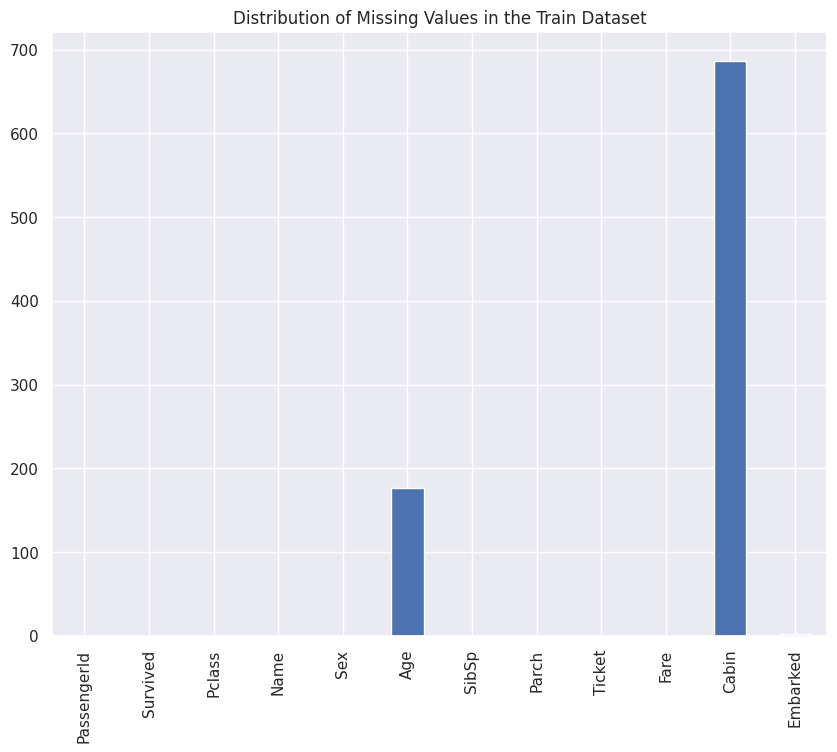

In [ ]:
#Distribution of missing Values in our train dataset
plt.figure(figsize=(10,8), dpi=100)
train.isna().sum().plot(kind='bar')
plt.title('Distribution of Missing Values in the Train Dataset');


In [ ]:
#Resolving Missing Data 

#Given the sheer high number of missing values in the Cabin column, we will drop 
#it from the dataset

train.drop('Cabin', axis=1, inplace=True)

train['Age'] = round(train['Age'].fillna(train['Age'].mean()))

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

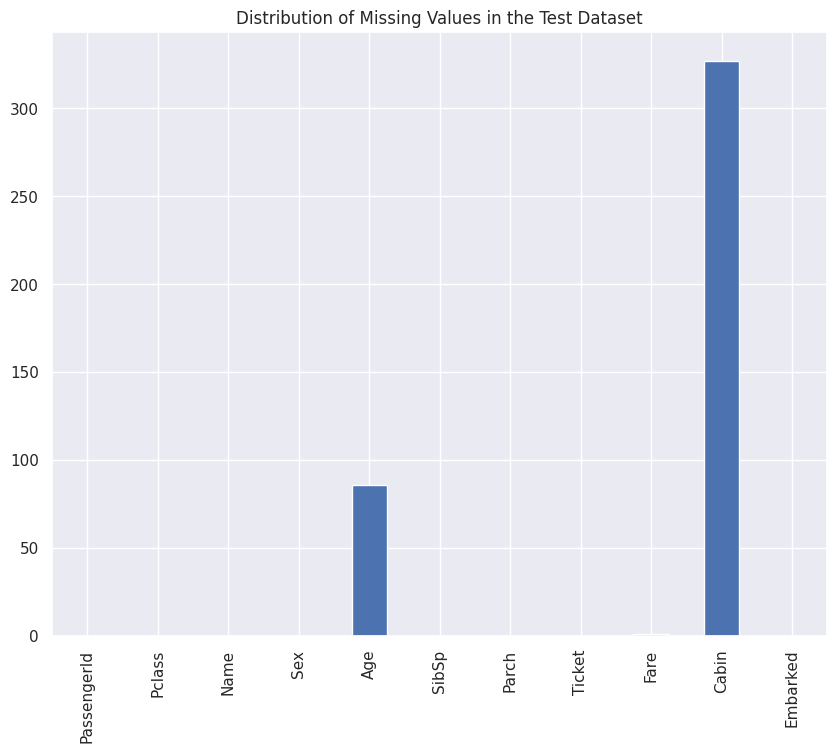

In [ ]:
#Checking for missing values in the test dataset
plt.figure(figsize=(10,8), dpi=100)
test.isna().sum().plot(kind='bar')
plt.title('Distribution of Missing Values in the Test Dataset');

In [ ]:
#Misisng Values in Our testdataset
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Resolving Missing Data 

#Given the sheer high number of missing values in the Cabin column, we will drop 
#it from the dataset

test.drop('Cabin', axis=1, inplace=True)

#Filling the Age missing values with the mean
test['Age'] = round(test['Age'].fillna(test.groupby('Sex')['Age'].transform('mean')))

#Filling the Misisng Fare value with the Mode fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

**Uniformity**

In [ ]:
#Checking whether we still have any missing values
print(train.isna().any().sum())

print(test.isna().any().sum())

0
0


In [ ]:
#Checking for Duplicates in the Train and test Dataset

print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


There are no duplicates in our dataset

**Feature Engineering**

In [ ]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
#We do not need the Passenger ID, Name and Ticket to answer our 
#research question

train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [ ]:
#Doing the same for the test dataset
test.head(1)

test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Outliers in the Dataset

In [ ]:
# We know the entries in our dataset were actual data points and should there be outliers 
#we won't be dropping them.
# As such we will proceed to the Analysis section

# **Saving Clean Datasets**

In [ ]:
train.to_csv('df.csv', index=False)



In [ ]:
test.to_csv('df1.csv', index=False)

# **5. Exploratory Data Analysis**

# **Univariate Analysis**

In [ ]:
df1 = pd.read_csv('df1.csv')

In [ ]:
df= pd.read_csv('df.csv')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


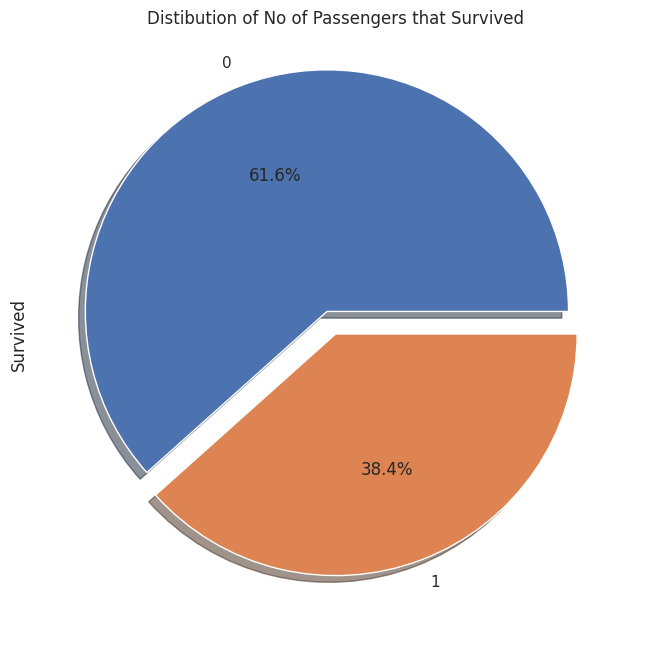

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
explode= (0.1,0)
df.Survived.value_counts().plot(kind='pie',explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distibution of No of Passengers that Survived');

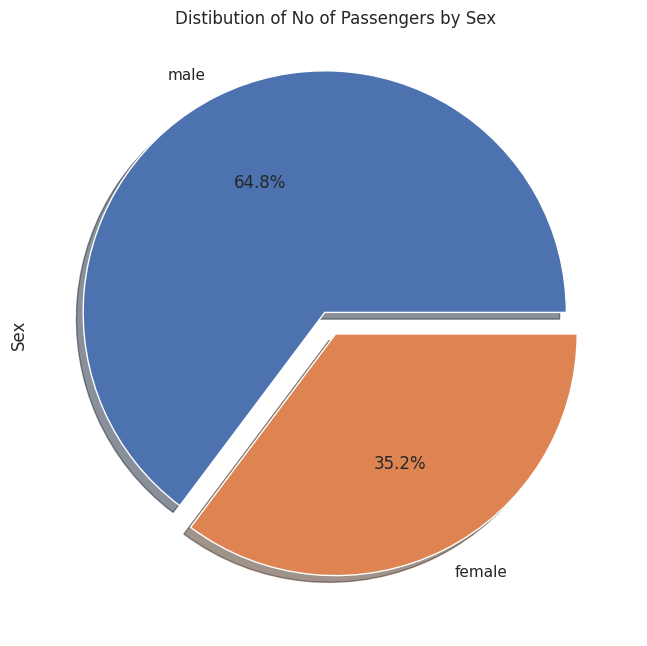

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
explode= (0.1,0)
df.Sex.value_counts().plot(kind='pie',explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distibution of No of Passengers by Sex');

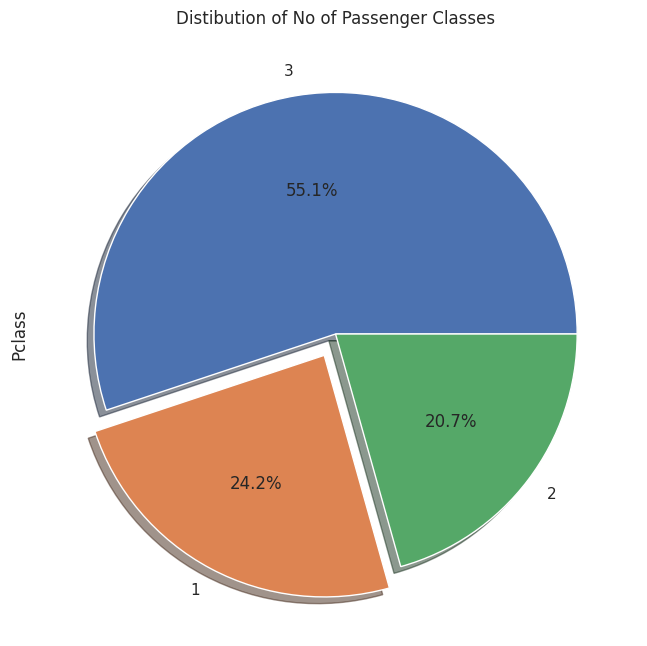

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
explode= (0.0,0.1, 0)
df.Pclass.value_counts().plot(kind='pie',explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distibution of No of Passenger Classes');

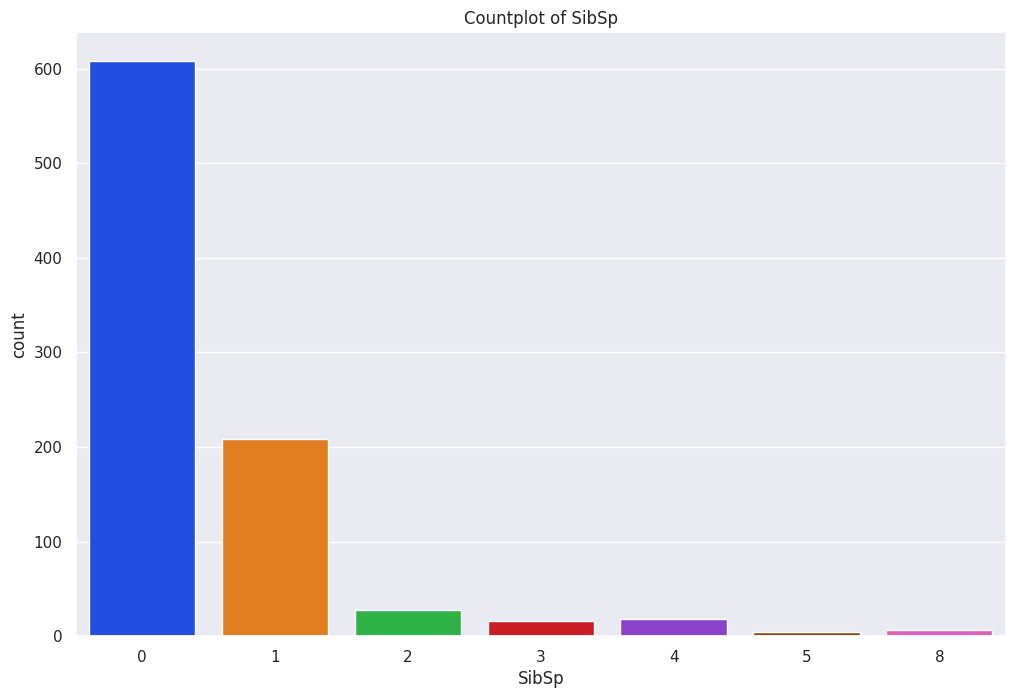

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='SibSp', palette='bright')
plt.title('Countplot of SibSp');

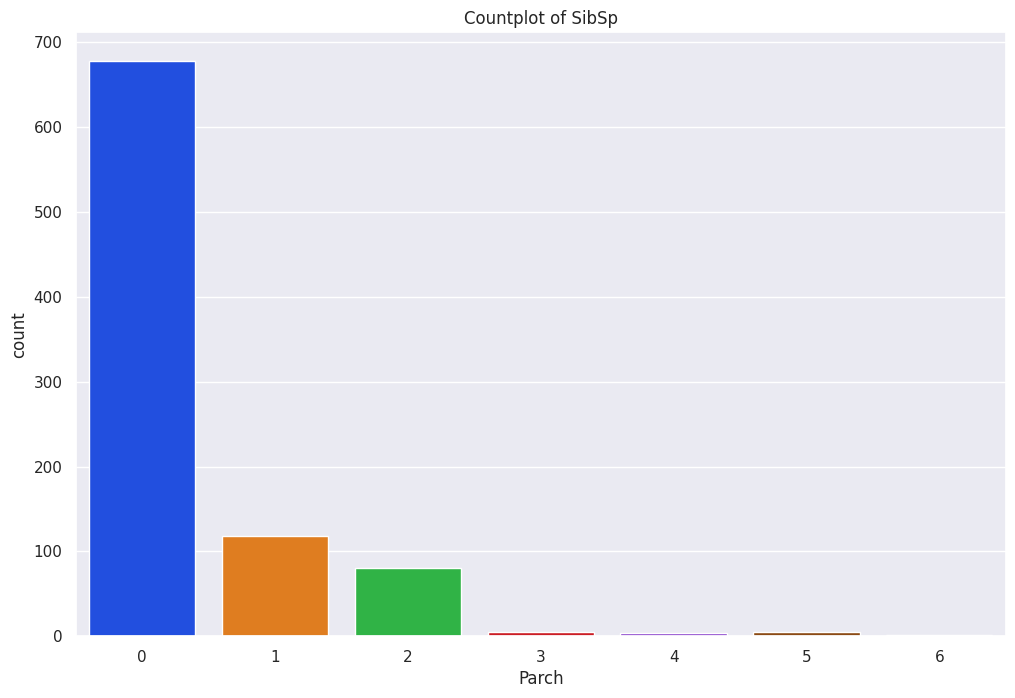

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='Parch', palette='bright')
plt.title('Countplot of SibSp');

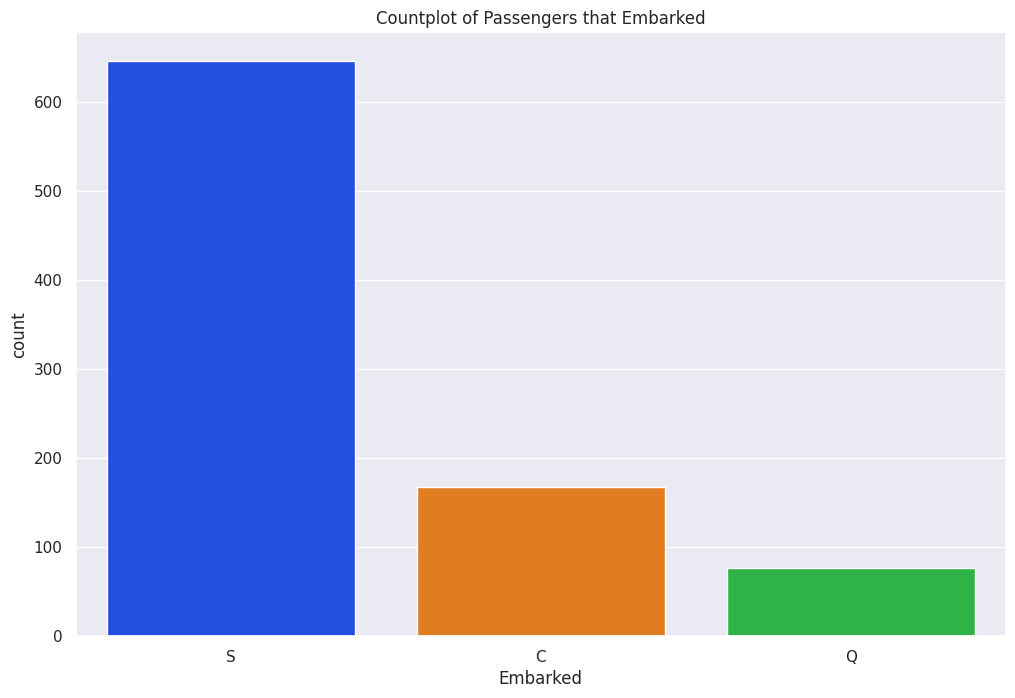

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='Embarked', palette='bright')
plt.title('Countplot of Passengers that Embarked');

In [ ]:
#Kurtosis of the Fare Column
df.Fare.kurt()

33.39814088089868

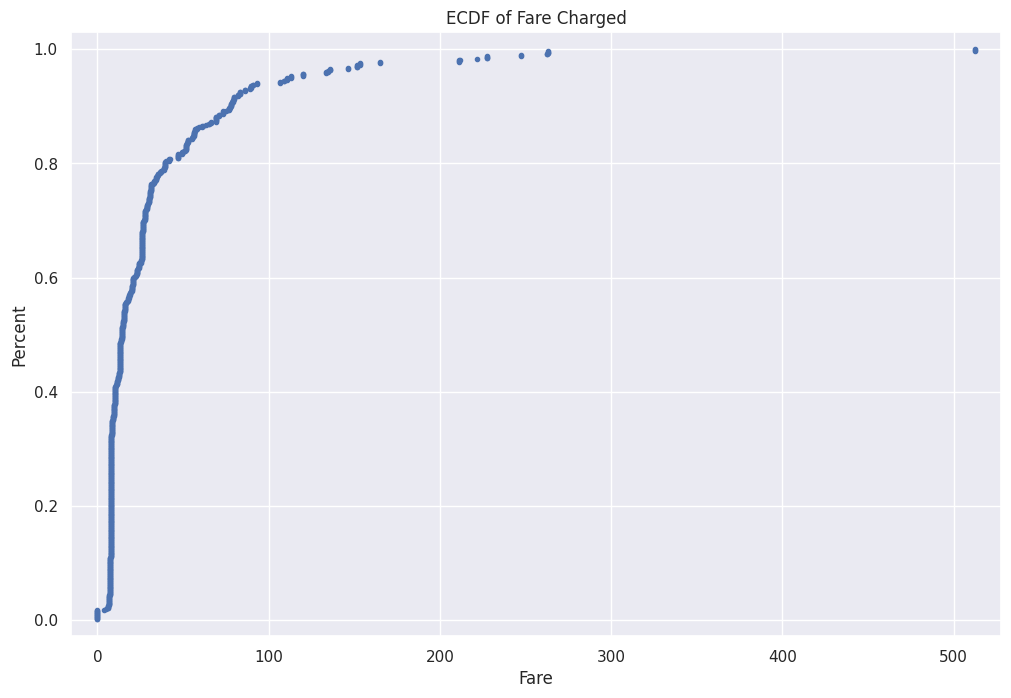

In [ ]:
# Creating our Empirical Cumulative Frequency Distribution function
def ecdf(data):
    """ 
    This function creates the x and y axis for an ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis
# Creating the xaxis and yaxis for our ecdf
x,y = ecdf(df['Fare'])

# Plotting our ecdf
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Fare Charged')
plt.xlabel('Fare')
plt.ylabel('Percent')
plt.margins(0.03)

The fare column follows a normal distribution.

Further more than 90% of the passengers paid less than 100 as fare

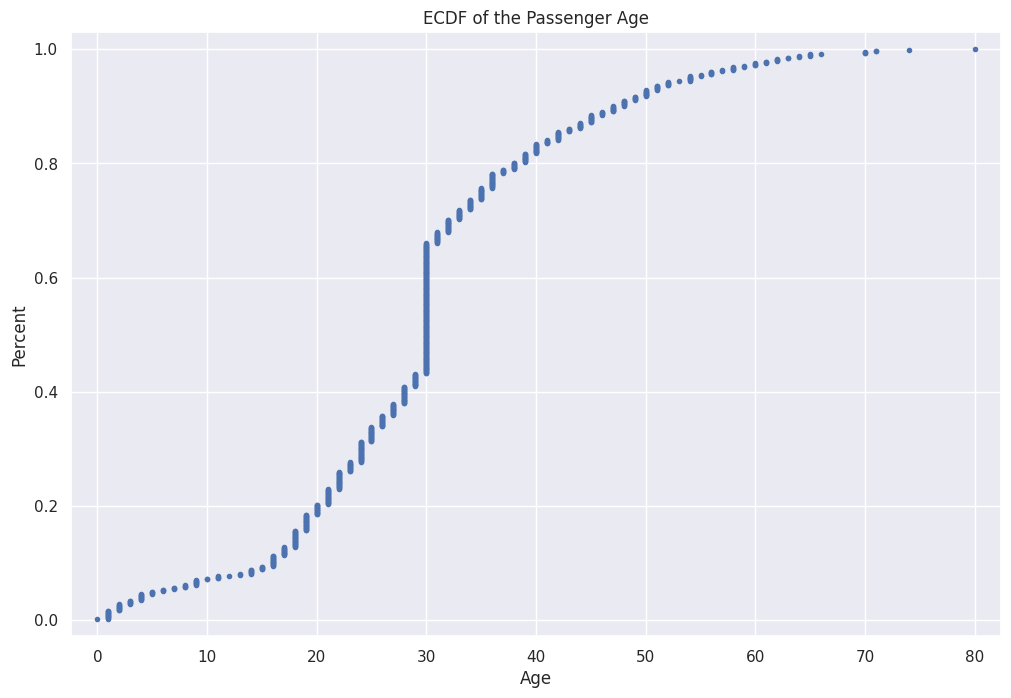

In [ ]:
#Ecdf of the Age Column
x,y = ecdf(df['Age'])

# Plotting our ecdf
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of the Passenger Age')
plt.xlabel('Age')
plt.ylabel('Percent')
plt.margins(0.03)

Age doesn't follow a standard normal. At least 50% of the passengers were 30 years and below.

# **Bivariate Analysis**

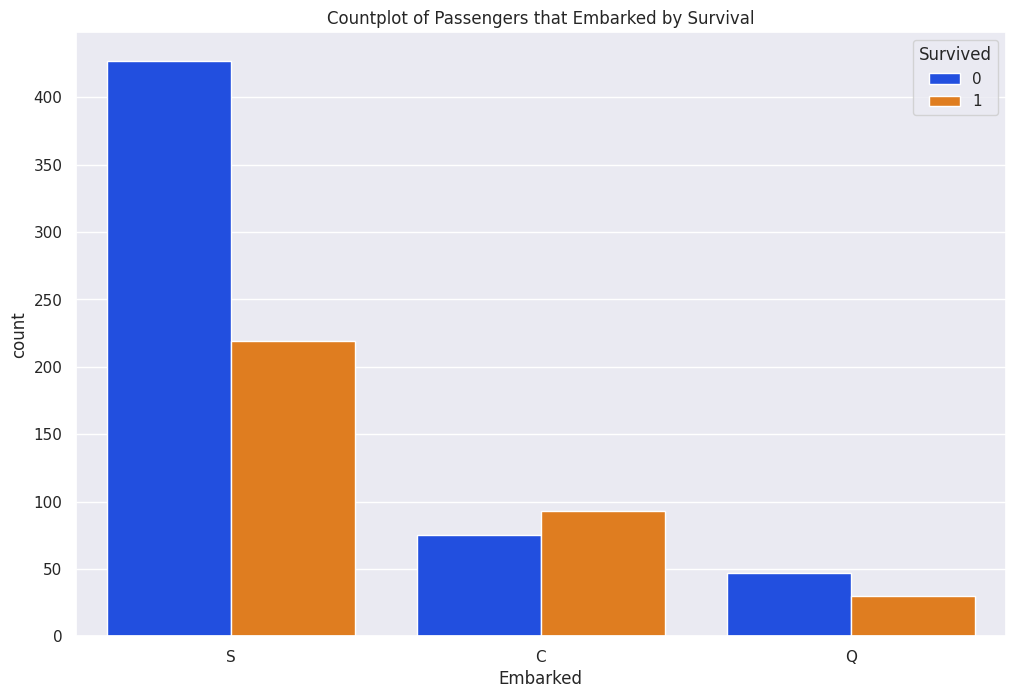

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='Embarked', hue='Survived', palette='bright')
plt.title('Countplot of Passengers that Embarked by Survival');

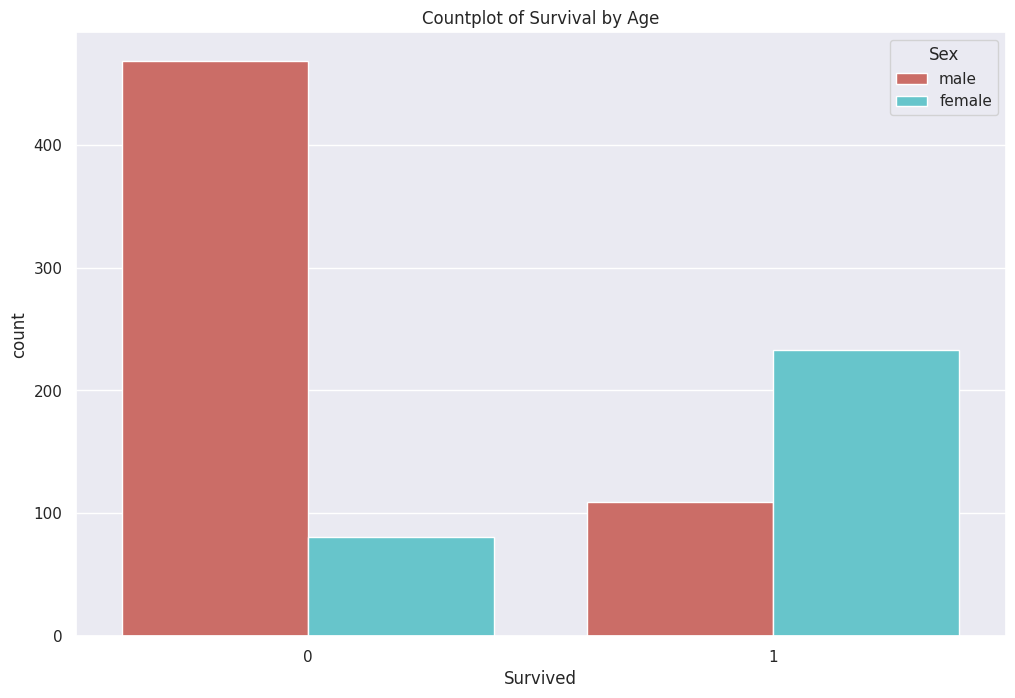

In [ ]:
#Countplot of Survival by Gender
plt.figure(figsize=(12,8), dpi=100)
sns.countplot(data=df, x='Survived', hue='Sex', palette='hls')
plt.title('Countplot of Survival by Age');

# **Multivariate Analysis**

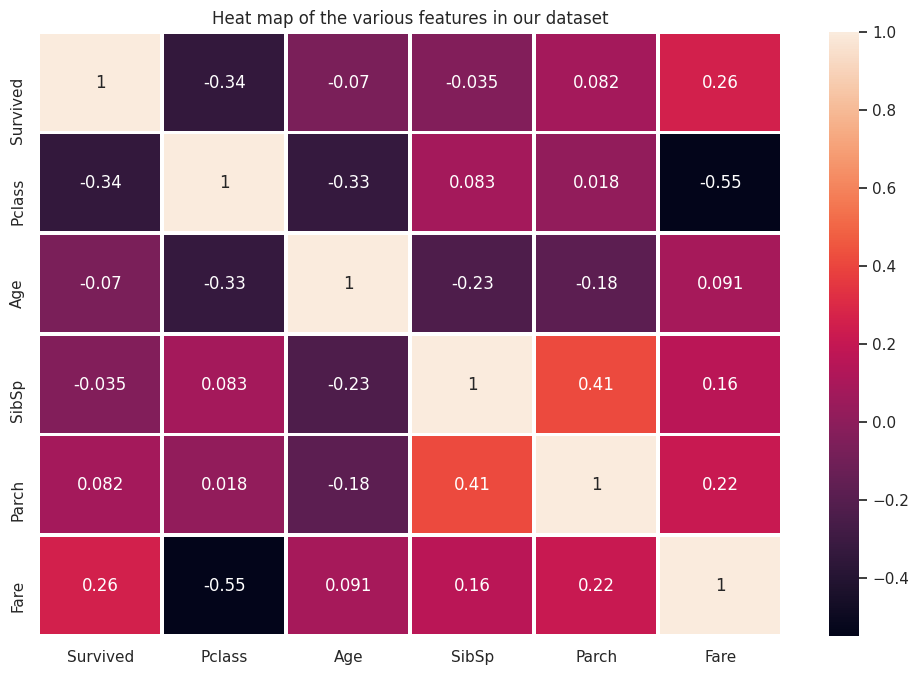

In [ ]:
#Visualizing the correlation between the various features in our dataset
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2)
plt.title('Heat map of the various features in our dataset');

In [ ]:
#We are missing the Gender column in the correlation matrix because it is not 
#in a numeric format. 

#COnverting gender column to numeric
df['Sex'] = df['Sex'].map({'male':1, 'female':0})



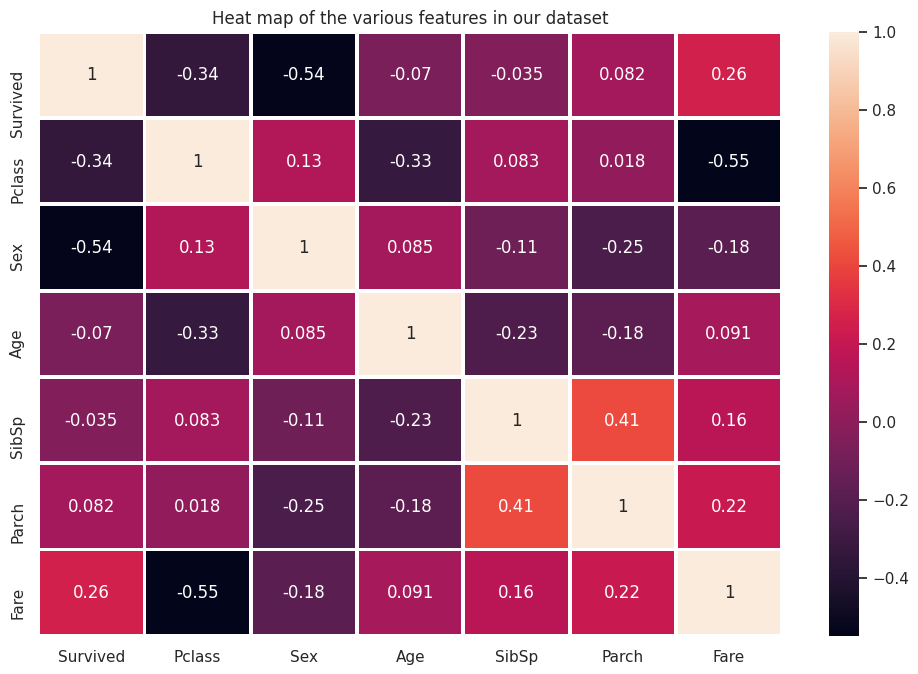

In [ ]:
#Visualizing the correlation between the various features in our dataset
fig, ax = plt.subplots(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2)
plt.title('Heat map of the various features in our dataset');

Text(0.5, 1.0, 'Pairplot of the Train Dataset')

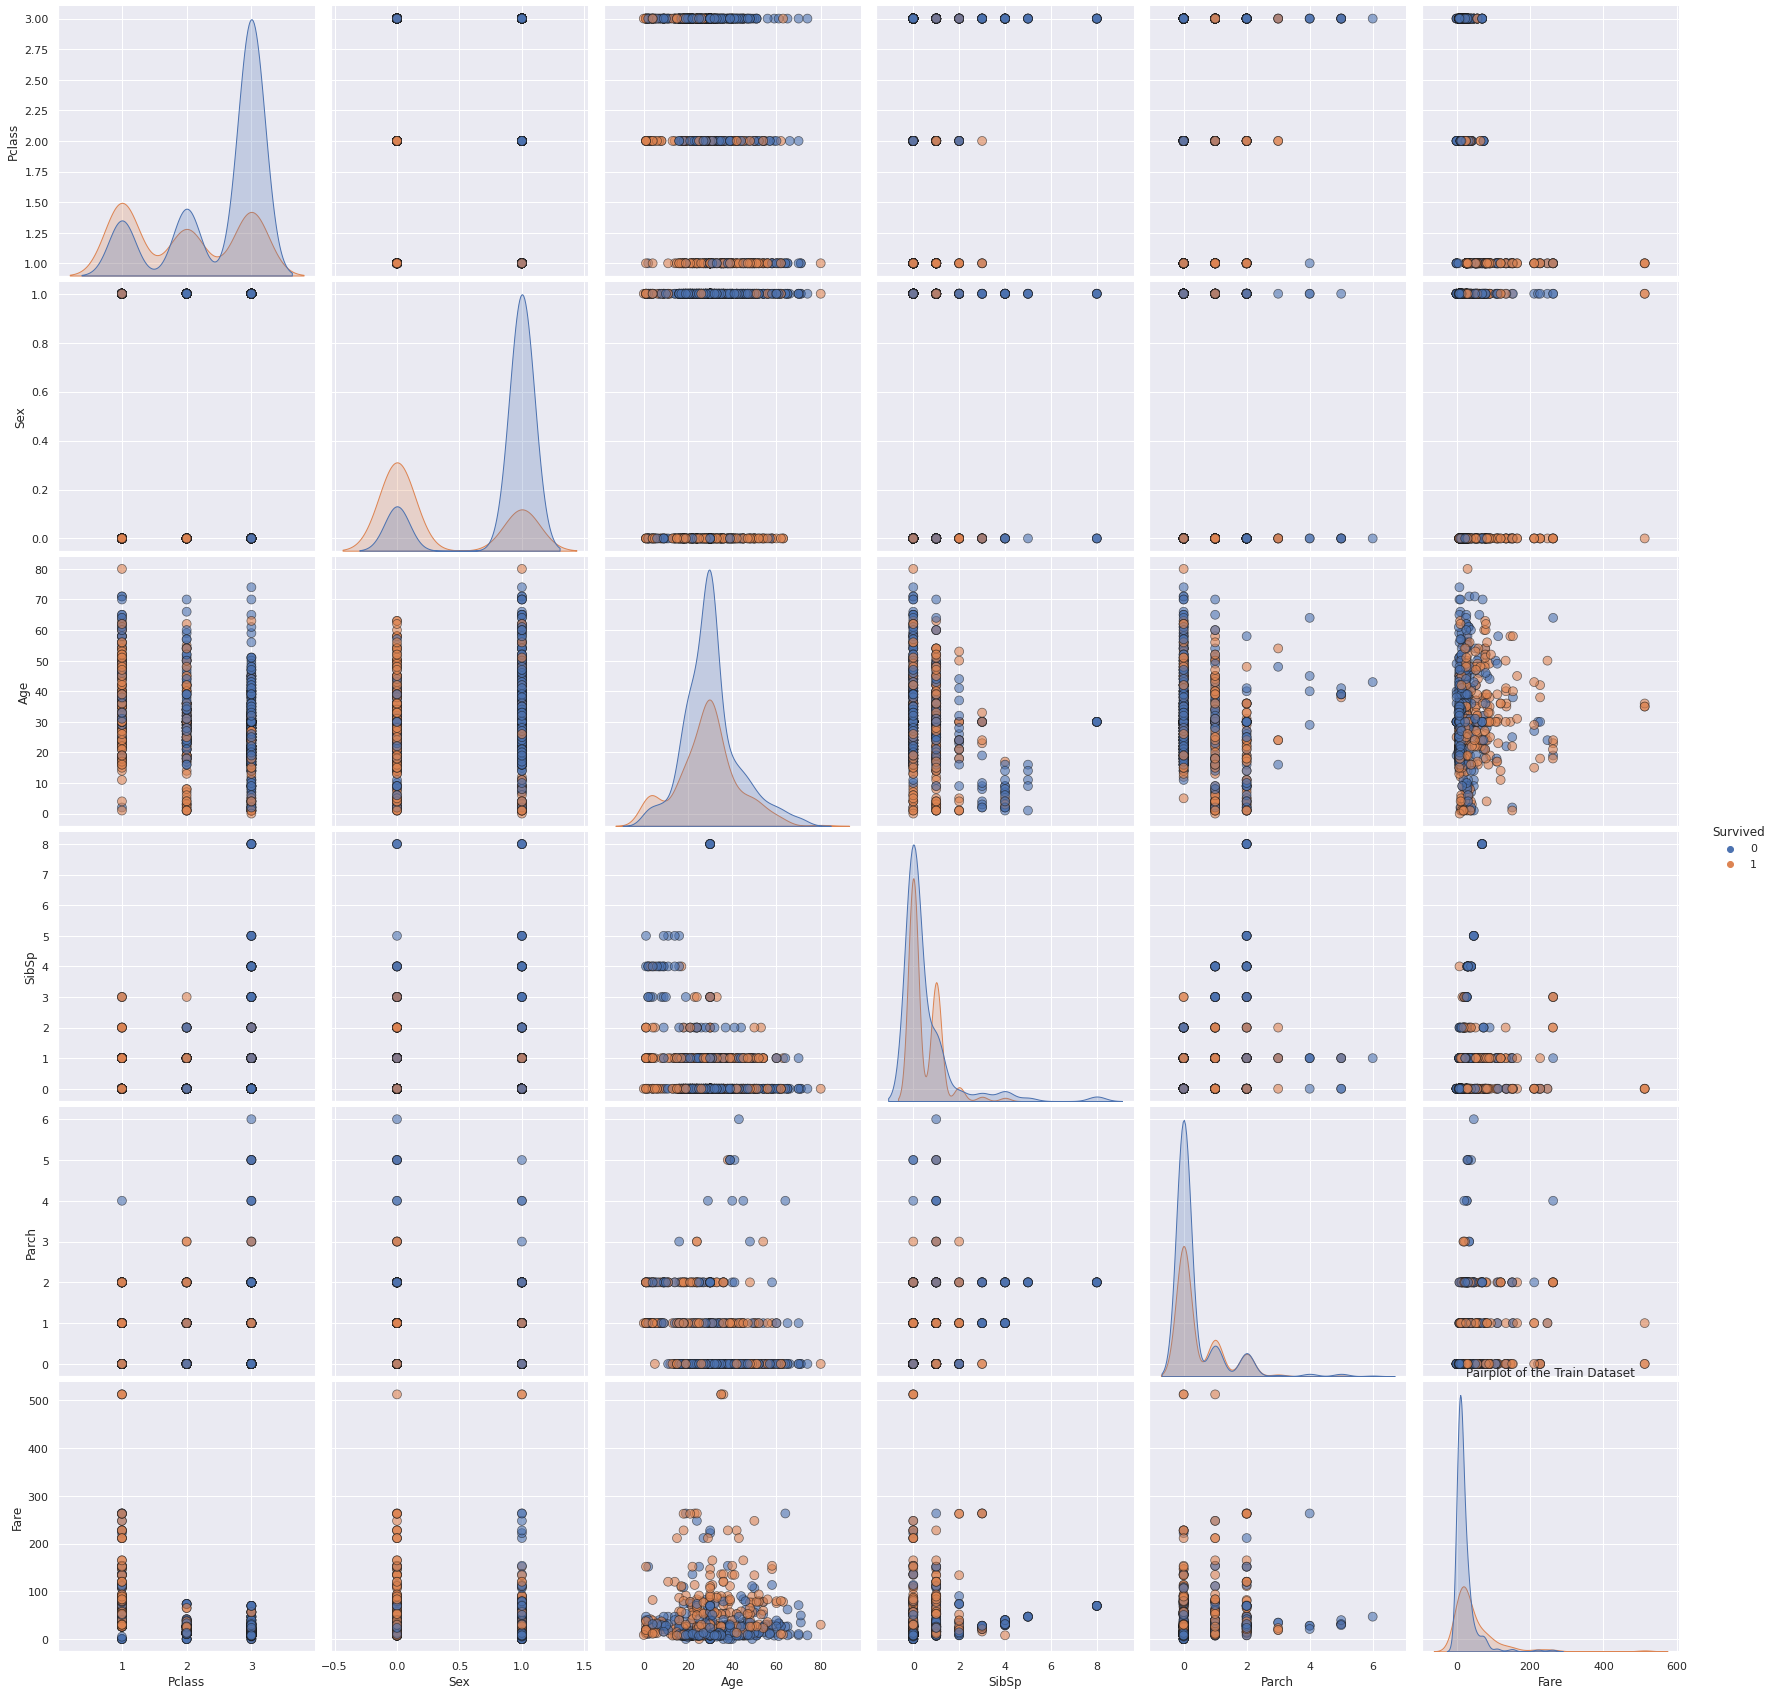

In [ ]:
#Plotting Pairplots is a powerful way of checking for relationships
sns.pairplot(df, hue='Survived', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size= 4 )
plt.title('Pairplot of the Train Dataset')

# **6. Modelling**

In this section we will build the K Nearest Neighbor Model which is a powerful non-parametric supervised machine model that leverages the distance between classes of things to make predictions as to what class an item is likely to belong. 

The model assumes that similar things exist in close proximity to each other. This is the major assumption of the Algorithm.

To apply this model, one has to determine the number of neighbors to use to test for proximity. Generally, one would like to pick an odd number to avoid a situation where we have a tie. This is because if an item has the same distance as two different classes, its difficult to make a decision. Oddity ensures that there would be a tie-breaker should this happen. 

Generally as we increase the value of K, the predictions stabilise due to majority voting. 

Advantages of KNN
1. It is versatile algorithm i.e., it can be used for both classification and regression tasks.

2. It is easy and simple to implement

# **Multicollinearity Check**

In [ ]:
#Since we are solving a classifcation problem, we will not focus so much on 
#coefficients like we would have done in a regression task. We will therefore,
#not perform this check.

# **Implementing K Nearest Neighbours**

# **80% and 20% Partition**

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
#Converting Embarked Column to numeric
df['Embarked'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [ ]:
#Data Preprocessing

#Defining Our independent variable
X = df.drop('Survived', axis=1)

#Defining our dependent variable
y=df['Survived']

In [ ]:
#Splitting our data

#Importing train split method from Sklearn
from sklearn.model_selection import train_test_split

#Splitting data into 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Pipeline with Scaler and KNN Model**

SkLearn has an object that can help carry out a sequence of repeated operations including scaling and modellng at the same time. This object is called a Pipeline and we will leverage its strength to determine the optimal parameters. The number of Ks in particular. 

In [ ]:
#Importing the Standard Scaler to standardize the data since KNN is 
#distance sensitive

from sklearn.preprocessing import StandardScaler

#Instantiating the Scaler
scaler = StandardScaler()

#Importing the KNN model

from sklearn.neighbors import KNeighborsClassifier


#Instantiating KNN Model

knn = KNeighborsClassifier()

In [ ]:
#Specifying the operations we would like our model to do
operations = [('scaler', scaler), ('knn', knn)]

In [ ]:
#Importing Pipeline from Sklearn

from sklearn.pipeline import Pipeline


#Instantiating the Pipeline

pipe = Pipeline(operations)

In [ ]:
#We can test for various values of K which would yield the best perfroming 
#parameters directly using the GridSearchCV

In [ ]:
#defining a set of K's
k_values = list(range(1, 20))

In [ ]:
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
#Specifying Our Parameters and saving them in the param_grid

param_grid ={'knn__n_neighbors': k_values}

In [ ]:
#Instanctiating Our Grid Search and passing in parameters

grid = GridSearchCV(pipe, param_grid, cv=5, scoring= 'accuracy' )

In [ ]:
#Fitting Our Model to data

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

In [ ]:
#Deriving the Best Parameters from our model
grid.best_estimator_.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 13,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                        weights='uniform'))],
 'verbose': False}

In [ ]:
#From Our results, we've established that the best metric is minkowski and the 
#number of K's is 13

In [ ]:
#Converting grid.cv_results_ to a dataframe, we can see our results under different parameters
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005069,0.002038,0.009266,0.004245,1,{'knn__n_neighbors': 1},0.748252,0.776224,0.753521,0.753521,0.767606,0.759825,0.010420,19
1,0.005980,0.001743,0.011119,0.003342,2,{'knn__n_neighbors': 2},0.804196,0.797203,0.753521,0.781690,0.781690,0.783660,0.017443,18
2,0.004156,0.000211,0.007377,0.000117,3,{'knn__n_neighbors': 3},0.839161,0.790210,0.809859,0.788732,0.788732,0.803339,0.019620,15
3,0.003918,0.000066,0.007506,0.000318,4,{'knn__n_neighbors': 4},0.825175,0.811189,0.795775,0.760563,0.816901,0.801921,0.022800,16
4,0.004040,0.000085,0.007487,0.000070,5,{'knn__n_neighbors': 5},0.825175,0.790210,0.802817,0.760563,0.816901,0.799133,0.022692,17
5,0.004083,0.000069,0.007797,0.000181,6,{'knn__n_neighbors': 6},0.825175,0.825175,0.816901,0.767606,0.845070,0.815985,0.025909,7
6,0.003952,0.000079,0.007763,0.000135,7,{'knn__n_neighbors': 7},0.797203,0.811189,0.823944,0.781690,0.830986,0.809002,0.017869,13
7,0.004374,0.000479,0.008212,0.000656,8,{'knn__n_neighbors': 8},0.825175,0.839161,0.845070,0.767606,0.838028,0.823008,0.028451,2
8,0.004647,0.000955,0.008754,0.001798,9,{'knn__n_neighbors': 9},0.818182,0.811189,0.795775,0.774648,0.830986,0.806156,0.019427,14
9,0.003929,0.000100,0.007932,0.000182,10,{'knn__n_neighbors': 10},0.818182,0.804196,0.823944,0.767606,0.852113,0.813208,0.027620,8


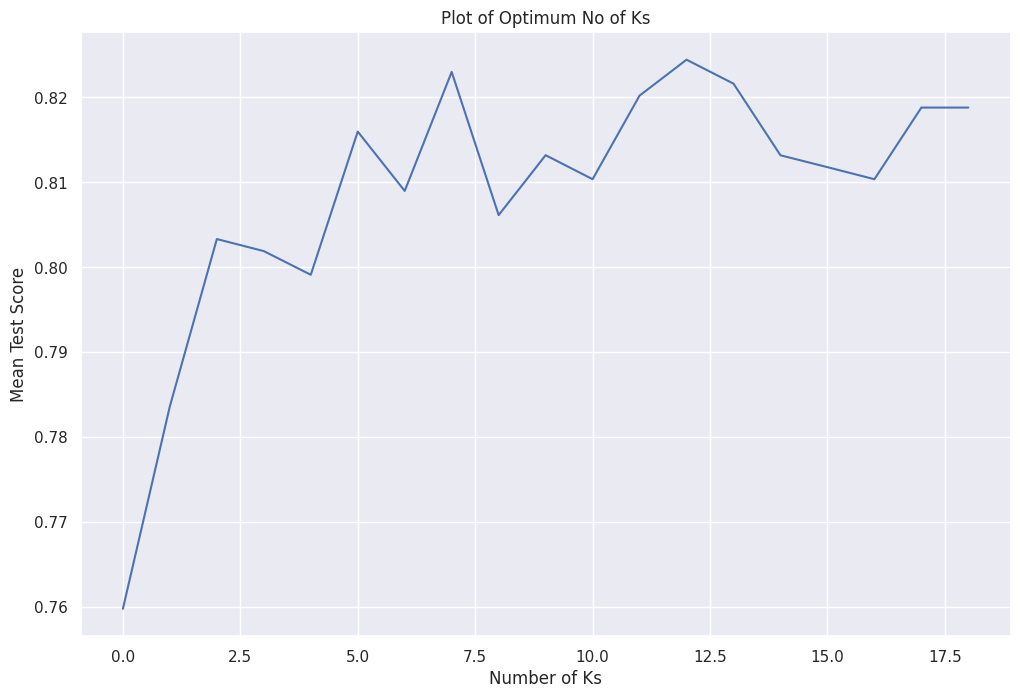

In [ ]:
#With knowledge of the parameters, we can visualize the impact of increasing K
#against the accuracy

optimum_k = pd.DataFrame(grid.cv_results_)


#Plotting the Optimum K
plt.figure(figsize=(12,8), dpi=100)
optimum_k.mean_test_score.plot()
plt.xlabel('Number of Ks')
plt.ylabel('Mean Test Score')
plt.title('Plot of Optimum No of Ks');

# **7. Model Performance Evaluation**

In [ ]:
#Applying Our model to the test data
preds = grid.predict(X_test)

In [ ]:
#Importing Our Model evaluation Metrics

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve, auc

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, preds)

array([[93, 12],
       [23, 51]])

In [ ]:
#Our Model is doing a good job but not a great job. We are misclassifying 35 points
#23 are false negatives

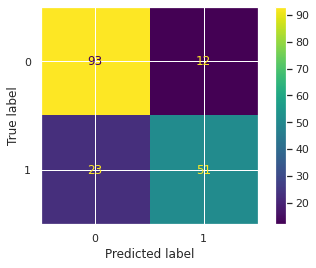

In [ ]:
plot_confusion_matrix(grid, X_test, y_test)

In [ ]:
#Printing the Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



We have 80% accuracy overally. With respect to specific predicition of survival, we have an accuracy score of 81% and 80% for deaths.

# **70-30 Partition**

In [ ]:
#Data Preprocessing

#Defining Our independent variable
X = df.drop('Survived', axis=1)

#Defining our dependent variable
y=df['Survived']

In [ ]:
#Splitting the data to 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Scaling our X_train variables
scaler = StandardScaler()

In [ ]:
 #Fit X_train to scaler and then transforming
 X_train = scaler.fit_transform(X_train)

In [ ]:
#We scale our X_test as above.
#NB. We dot fit our test data as that only applies to our training data
#We do not want any leakages from our training data including scaling data
X_test = scaler.transform(X_test)

In [ ]:
#Having established that the optimal number of K is 13, we instantiate
#KNN with 13 neighbours

knn_n =KNeighborsClassifier(n_neighbors=13)

#Fitting the model to the train data
knn_n.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

# **70-30 Model Evaluation**

In [ ]:
#Applying model to our test data
preds = knn_n.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, preds)

array([[143,  14],
       [ 38,  73]])

<Figure size 864x576 with 0 Axes>

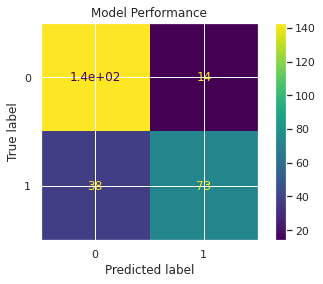

In [ ]:
#Plotting the Confusion Matrix
plot_confusion_matrix(knn_n, X_test, y_test)
plt.title('Model Performance');

In [ ]:
#Printing the Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



With a 70% partition, our accuracy levels increase by 1% to 81%. The precision in calling Survival accurately is about 84%. For deaths we achieve 79% accuracy.

# **60%-40% Partition**

In [ ]:
#Data Preprocessing

#Defining Our independent variable
X = df.drop('Survived', axis=1)

#Defining our dependent variable
y=df['Survived']

In [ ]:
#Splitting the data to 60% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
#Scaling our X_train variables
scaler = StandardScaler()

In [ ]:
 #Fit X_train to scaler and then transforming
 X_train = scaler.fit_transform(X_train)

In [ ]:
#We scale our X_test as above.
#NB. We dot fit our test data as that only applies to our training data
#We do not want any leakages from our training data including scaling data
X_test = scaler.transform(X_test)

In [ ]:
#Having established that the optimal number of K is 13, we instantiate
#KNN with 13 neighbours

knn =KNeighborsClassifier(n_neighbors=13)

#Fitting the model to the train data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

# **60-40 Model Evaluation**

In [ ]:
#Applying model to our test data
preds = knn.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, preds)

array([[191,  25],
       [ 48,  93]])

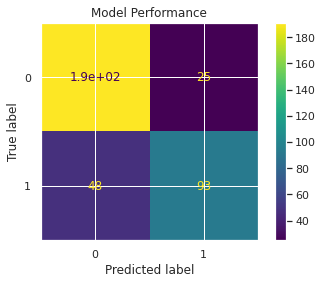

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Model Performance');

In [ ]:
#Printing the Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       216
           1       0.79      0.66      0.72       141

    accuracy                           0.80       357
   macro avg       0.79      0.77      0.78       357
weighted avg       0.79      0.80      0.79       357



# **Further Optimization of Model Performance**

In [ ]:
#To optimize Performance of our model, we can reduce the number of
#dimensions. For such reductions, the LDA will be the most suitable.
#Thus far, the 70-30 split returns the highest accuracy levels
#We will therefore apply LDA on a 70,30 split.

In [ ]:
#Data Preprocessing

#Defining Our independent variable
X = df.drop('Survived', axis=1)

#Defining our dependent variable
y=df['Survived']

In [ ]:
#Splitting the data to 60% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scaling our X_train variables
scaler = StandardScaler()

In [ ]:
 #Fit X_train to scaler and then transforming
 X_train = scaler.fit_transform(X_train)

In [ ]:
#Scaling X_test
X_test = scaler.transform(X_test)

In [ ]:
#Importing LDA from Sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Instantiating LDA
lda_model = LinearDiscriminantAnalysis(n_components=1)

In [ ]:
#Fitting Model to Data
X_train = lda_model.fit_transform(X_train, y_train)

X_test = lda_model.transform(X_test)



In [ ]:
#Having established that the optimal number of K is 13, we instantiate
#KNN with 13 neighbours

knn =KNeighborsClassifier(n_neighbors=13)

#Fitting the model to the train data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

# **Model Performance Evaluation**

In [ ]:
#Applying model to our test data
preds = knn.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test, preds)

array([[139,  18],
       [ 36,  75]])

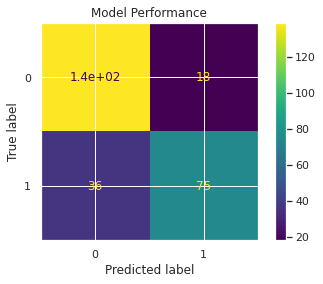

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Model Performance');

In [ ]:
#Printing the Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.81      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



There is no meaningful change in the performance of our model, the 70% split without LDA still performs better. 

# **7. Conclusion and Recommendations**

**Conclusions**

Generally, our models with k=13 are performing well. We established after building our pipeline that the best K param was 13. 

All our models i.e with the various splits are return accuracy values of at least 80%.

Split of 70% gave us the highest accuracy at 81%

Noteworthy, the Reduction Technique we apply in our best performing model does not yield better results. 

**Recommendation**

Apply other classifcation techniues and test whether we improve on the accuracy scores

**Follow Up Questions**

a) Did we have the right data? Yes

b)Did we have the right question? Yes

# **Saving Our Best Performing Model**

In [ ]:
#Import Joblib
from sklearn.externals import joblib

In [ ]:
#Saving Our Model
joblib.dump(knn_n, 'knn_n_joblib')

['knn_n_joblib']

# **Applying Model to Test Data**

In [ ]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.0,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [ ]:
#Converting Strings to Numeric values
#Converting Embarked Column to numeric
df1['Sex'] = df1['Sex'].map({'male':1, 'female':0})
df1['Embarked'] = df1['Embarked'].map({'S':1, 'C':2, 'Q':3})

In [ ]:
X= df1

In [ ]:
#Scaling Our variables
X = scaler.fit_transform(X)

In [ ]:
#Loading Our Model
model = joblib.load('knn_n_joblib')

In [ ]:
#Making predictions
preds = model.predict(X)

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Our results in DataFrame format
results = pd.DataFrame({'Prediction': preds})

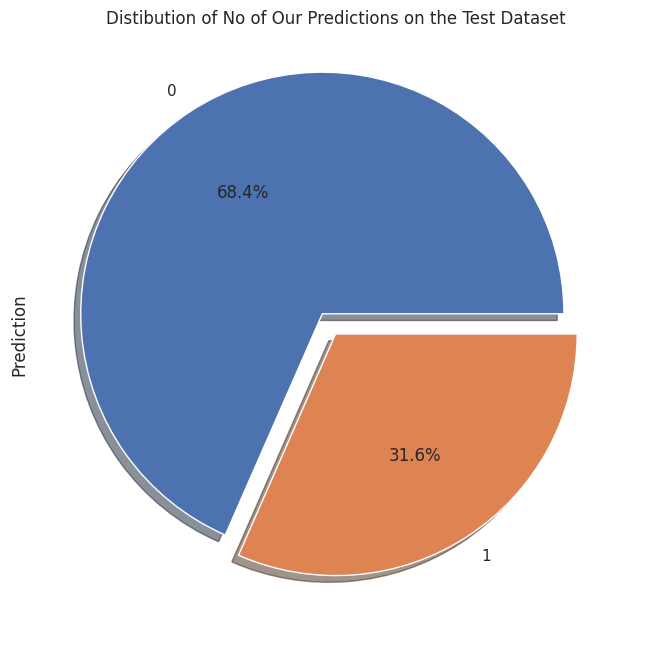

In [ ]:
#Visualizing Our Results
plt.figure(figsize=(12,8), dpi=100)
explode= (0.1,0)
results.Prediction.value_counts().plot(kind='pie',explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distibution of No of Our Predictions on the Test Dataset');